In [111]:
# loading the scrapper & analysis functions
from comment_crawler import *
from comment_crawler_analysis import *
from graphs_and_charts import *
from authors_names import *

In [112]:
%run comment_crawler.py
%run comment_crawler_analysis.py
%run graphs_and_charts.py
%run authors_names.py

#### Define the starting urls list:

In [3]:
starting_urls_list

['https://mymadison.io/documents/city-of-buffalo-open-data-policy',
 'https://mymadison.io/documents/durham-open-data-policy',
 'https://mymadison.io/documents/city-of-tyler-data-policy',
 'https://mymadison.io/documents/city-of-glendale-draft-open-data-resolution',
 'https://mymadison.io/documents/metro-nashville-government-open-data-policy',
 'https://mymadison.io/documents/city-of-syracuse-open-data-policy',
 'https://mymadison.io/documents/napervilleopendatapolicy',
 'https://mymadison.io/documents/bart-open-data-policy',
 'https://mymadison.io/documents/san-francisco-open-data-legislation-2014']

### Scrapping all the open data policy comments and policy texts for all Madison websites and putting them into dataframes

In [4]:
all_madison_dfs, all_cities_dataframe, full_policy_text = go_all_madison_websites(starting_urls_list);

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/summerfellow/anaconda/envs/py35/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [116]:
print ('\033[1m' + "Names of cities under analysis:")
print()
for name, city, policy, support in all_madison_dfs:
    print('\033[0m' + name)

Names of cities under analysis:

Buffalo
Durham
Tyler
Glendale
Nashville
Syracuse
Naperville
Bart
San Francisco


# --- Analysis ----

# 1.1) Most frequent words

## a) most common words in quoted texts (policy sections)

### (top 20 words) for all the cities combined


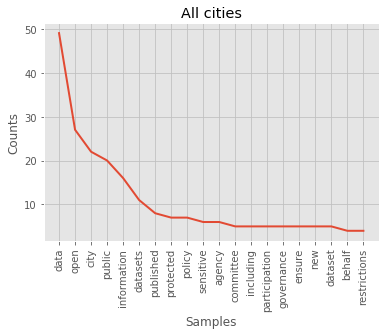

,word,quoted_text_freq
0,data,49
1,open,27
2,city,22
3,public,20
4,information,16


In [7]:
common_words_quoted_texts("quoted_text", "All cities", all_cities_dataframe, 20, "both").head()

## b) most common words in actual comments

### (top 20 words) for all the cities combined


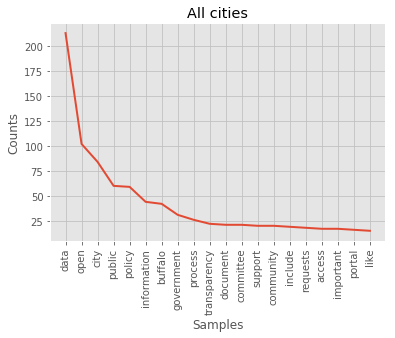

,word,comment_text_freq
0,data,213
1,open,102
2,city,84
3,public,60
4,policy,59


In [8]:
common_words_quoted_texts("comment_text", "All cities", all_cities_dataframe, 20, "both").head()

 There is a lot of noise just by counting the word frequency. For instance, words that are *expected* to occur frequently such as "data" and "open" don't add much to our understanding of which policy sections residents quote the least or most often.

# 1.2) compare quoted-text frequency with the policy-text frequency

### for all cities

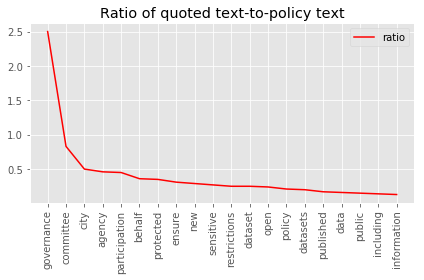

,word,policy_text_freq,quoted_text_freq,ratio
0,governance,2,5,2.50
1,committee,6,5,0.83
2,city,44,22,0.50
3,agency,13,6,0.46
4,participation,11,5,0.45
5,behalf,11,4,0.36
6,protected,20,7,0.35
7,ensure,16,5,0.31
8,new,17,5,0.29
9,sensitive,22,6,0.27


In [9]:
ratio_quoted_freq_with_policy_freq("single_line_graph", "quoted_text", "Ratio of quoted text-to-policy text", all_cities_dataframe, 20, full_policy_text, "single", "descending")

Words like "governance", "committee", "protected", "sensitive" and so on are quoted more often relative to the number of times they are mentioned in the policy. This shows that people are talking and engaging more closely with topics on *governance*, *privacy* and *utility*.

# 1.3) compare comments-text frequency with the policy-text frequency

### for all cities

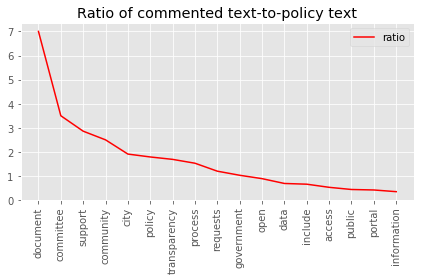

,word,policy_text_freq,comment_text_freq,ratio
0,document,3,21,7.00
1,committee,6,21,3.50
2,support,7,20,2.86
3,community,8,20,2.50
4,city,44,84,1.91
5,policy,33,59,1.79
6,transparency,13,22,1.69
7,process,17,26,1.53
8,requests,15,18,1.20
9,government,30,31,1.03


In [10]:
ratio_quoted_freq_with_policy_freq("single_line_graph", "comment_text", "Ratio of commented text-to-policy text", all_cities_dataframe, 20, full_policy_text, "single", "descending")

Similarly, in user comments, words like *governance* and *committee* were used often, confirming that these are  important policy sections. Words such as *community* and *transparency* are also used often in comments, indicating that feedback from community and how open data policy relates to transparency were among the favorite topics discussed by users.

# 2) Sentiment Analysis

## a) sentiment analysis for all the cities combined for most frequently quoted policy sections

total_comments: 18 --- city name: All Cities


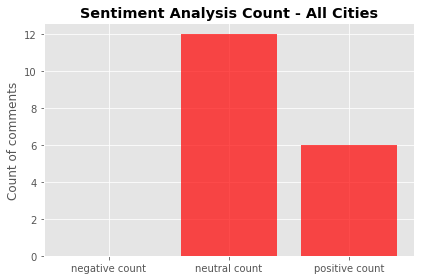

In [11]:
sentimental_analysis_graphs_3 = top_policy_sections_commented(all_cities_dataframe, "most_common_policy", 3)

## b) sentiment analysis for all the cities (aggregate) for all comments

total_comments: 164 --- city name: All Cities


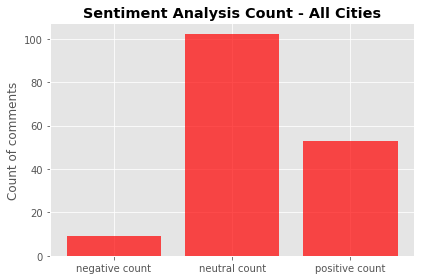

In [12]:
sentimental_analysis_graphs_4 = top_policy_sections_commented(all_cities_dataframe, "all_common_comments", 3)

The chart shows that out of 164 comments, a little over a 100 are neutral comments. Neutral comments are in the form of questions or recommendations to improve various parts of open data policy.

A lot of comments (50+) appreciate the open data policy where as only a handful of comments have been categorized as less favorable comments.

# 3) Analyzing positive and negative sentiments

In [51]:
neg_count = sentimental_analysis_graphs_4[0][1]
neu_count = sentimental_analysis_graphs_4[0][3]
pos_count = sentimental_analysis_graphs_4[0][5]

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "upper corner". Falling back on "best"; valid locations are
	lower left
	best
	lower right
	lower center
	right
	upper right
	center left
	center
	center right
	upper left
	upper center

  six.iterkeys(self.codes))))


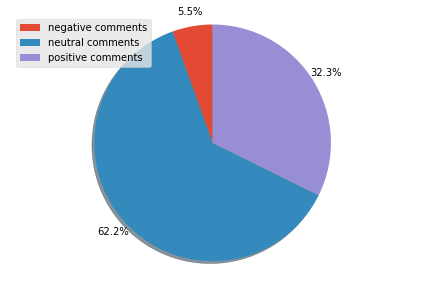

In [52]:
labels = ['negative comments', 'neutral comments', 'positive comments']
sizes = [neg_count, neu_count, pos_count]

pie_chart(sizes, labels, 'sentiment-analysis-pie-chart')

Out of 164 comments, about 62% of them were either questions to understand policy better or suggestions for improvements in different policy sections. In general, people were curious to learn more about how confidential data will be handled, how the FOIA requests will be processed and whether they will be made available in a timely manner, and the potential for community organizations and academic institutions to host their data on open data portals. 


### a) Positive comments

In [53]:
pos_comments = sentimental_analysis_graphs_4[2]
pos_comments_dict = all_cities_dataframe[all_cities_dataframe['comment_text'].isin(pos_comments)].reset_index()
pos_comments_dict.head(3)

,index,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,reply_ids_count,city_name
0,1,E4-XFnl1uKc,Aaron Lee,2017-01-25 04:32:19,2,None,I am in support of the proposed policy to furt...,<p>I am in support of the proposed policy to f...,[],0,Buffalo
1,2,E4-XFnjG3Ac,Aaron Lee,2017-01-25 04:25:20,0,public participation by providing regular oppo...,I would be interested to see this more finely ...,<p>I would be interested to see this more fine...,[],0,Buffalo
2,3,E4-XFnQhy2g,Aaron Krolikowski,2017-01-24 22:56:17,3,None,"I strongly support the proposed policy, with a...","<p>I strongly support the proposed policy, wit...",[],0,Buffalo


In [54]:
for index, row in pos_comments_dict.iterrows():
    print('\033[1m' + "City:", row['city_name'])
    print('\033[0m' + "Partial quoted text:", row['quoted_text'])
    print('\033[1m' + "Comment text:", row['comment_text'])
    print()

City: Buffalo
Partial quoted text: None
Comment text: I am in support of the proposed policy to further enable data and subsequent knowledge sharing. I agree with fellow contributors that it would be beneficial to see more detailed outlines for the specific process that is going to enable community members to contribute to the Open Data portal by creating, uploading and verifying data sets to be published. Myself and colleagues have created a number of valuable data sets that could be beneficial across city departments, community organizations and individual interests. Understanding that only data sets meeting the standards set forth as a result of this policy will be accepted, we can collaboratively drive the understanding of our community from all perspectives.

City: Buffalo
Partial quoted text: public participation by providing regular opportunities for feedback and collaboration
Comment text: I would be interested to see this more finely documented. It would be great to have a liv

In [117]:
# hand-made (this needs eye-balling comments/quoted policy text every time a policy is updated/new policy is added)

pos_main_policies = ['Open Data Governance Committee', "Opportunities for Citizen Feedback", 'Privacy and Security', 'Useful, quality and timely data', "Prioritizing the release of open data", "Open Data Access"]
count_pos_policies = [2,5,1,8,4,4]
# release of historical data, how can other people host datasets on their platform, budget for data literacy, keep the document a living document so there are feedback loops

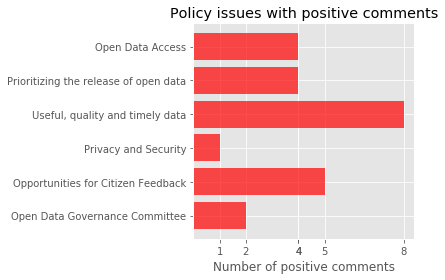

In [118]:
horizontal_bar(pos_main_policies, count_pos_policies, "Number of positive comments", "Policy issues with positive comments")

A hefty number of users (32%) also expressed joy and enthusiasm. For example, Jurnell Cochren, a software developer, was delighted to see that the City of Nashville provided a Data Catalog, also known as metadata, for all its datasets so that users can understand and explore the datasets easily. Majority of positive comments cherished or recommended city’s capacity to store historical records, keep open data policy a living document with feedback loops, and provide residents data literacy to access data.

### b) Negative Comments

In [57]:
neg_comments = sentimental_analysis_graphs_4[1]
neg_comments_dict = all_cities_dataframe[all_cities_dataframe['comment_text'].isin(neg_comments)]
neg_comments_dict.head(3)

,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,reply_ids_count,city_name
46,E4-XFfET0X4,Andrew Nicklin,2017-01-17 03:03:41,0,policy concerns,risks to the public,<p>risks to the public</p>,[E4-XFfIhTHE],1,Buffalo
51,E4-XFepJkRo,Andrew Nicklin,2017-01-17 02:49:03,0,no legal encumbrances on use or reuse,If limiting the City's liability for how the d...,<p>If limiting the City's liability for how th...,[E4-XFinM1no],1,Buffalo
56,E4-XFeYAFQQ,Chris Slocum,2017-01-17 02:08:41,1,"Ensure that access to restricted data is blocked,",There should be a publicly available list of w...,<p>There should be a publicly available list o...,[],0,Buffalo


In [58]:
for index, row in neg_comments_dict.iterrows():
    print('\033[1m' + "City:", row['city_name'])
    print('\033[0m' + "Partial quoted text:", row['quoted_text'])
    print('\033[1m' + "Comment text:", row['comment_text'])
    print()

City: Buffalo
Partial quoted text: policy concerns
Comment text: risks to the public

City: Buffalo
Partial quoted text: no legal encumbrances on use or reuse
Comment text: If limiting the City's liability for how the data is used is considered a legal encumbrance then this phrase should be removed or modified. It's also conceivable you want Terms & Conditions on your open data which prohibit the use of data when committing a crime, etc.

City: Buffalo
Partial quoted text: Ensure that access to restricted data is blocked,
Comment text: There should be a publicly available list of what is blocked and why. Having this list facilitates transparency and understanding of how the government operates.

City: Glendale
Partial quoted text: None
Comment text: This is way past due. The current system is awful and discourages citizen evolvement.
Please continue on with this vital upgrade.

City: Syracuse
Partial quoted text: open formats
Comment text: "Open formats" wasn't defined above. I assume 

We also observed some less favorable comments (5.5%). An example of a less favorable comment was about Glendale’s updated policy on getting citizen feedback. The comment emphasized the need to catch up with updated policy and stated that the city’s old policy was “awful” and “discouraged citizen involvement”. 

# 4) Analyzing the most popular policy sections

### 3-word long quoted policy text

In [13]:
popular_sections_3 = sentimental_analysis_graphs_3[3]
filtered_pop_sections_3 = pd.DataFrame()

for phrase, count in popular_sections_3:
    filtered_pop_sections_3 = filtered_pop_sections_3.append(all_cities_dataframe[all_cities_dataframe['quoted_text'].astype(str).str.contains(phrase)])

filtered_pop_sections_3 = filtered_pop_sections_3.reset_index()

In [14]:
popular_sections_3 #popular sections phrases, number of times they are quoted

[('the Open Data', 6),
 ('Data Governance Committee', 5),
 ('Open Data Governance', 5),
 ('protected and sensitive', 4),
 ('and sensitive information', 4),
 ('of the City', 4),
 ('on behalf of', 4),
 ('including the records', 3),
 ("the City 's", 3),
 ('city ’ s', 3)]

In [15]:
# There are some duplicate comments from people when we filter comments according to the criteria of 3-word long quoted policy text
filtered_pop_sections_3 = filtered_pop_sections_3.drop_duplicates("comment_text")

In [16]:
for index, row in filtered_pop_sections_3.iterrows():
    print('\033[1m' + "City:", row['city_name'])
    print('\033[0m' + "Partial quoted text:", row['quoted_text'])
    print('\033[1m' + "Comment text:", row['comment_text'])
    print()

City: Buffalo
Partial quoted text: Provide for a future means of digitizing archived material that was in existence prior to the development of the Open Data Program;
Comment text: That would be super helpful :)

City: Buffalo
Partial quoted text: periodically update the data based on internal and external needs; serve on the Open Data Governance Committee; upon request, meet with the Open Data Governance Committee to discuss any matter pertaining to implementation of this Order; and assist in the preparation of the annual open data compliance report.
Comment text: Would this liaison be the contact person if a dataset user (ie a student doing a project or a researcher) had questions about the set?

City: Buffalo
Partial quoted text: Develop and implement a process for prioritizing the release of datasets to the Open Data Portal which takes into account new and existing signals of interest from the public (such as the frequency of FOIL requests), the City's programmatic priorities, exis

In [59]:
# hand-made (this needs eye-balling comments/quoted policy text every time a policy is updated/new policy is added)
main_policies_3 = ['Open Data Governance Committee', "Opportunities for Citizen Feedback", 'Privacy and Security', 'Useful, quality and timely data', "Prioritizing the release of open data", 'Open Data Access']
count_pop_policies_3 = [6, 2, 5, 5, 2, 0]

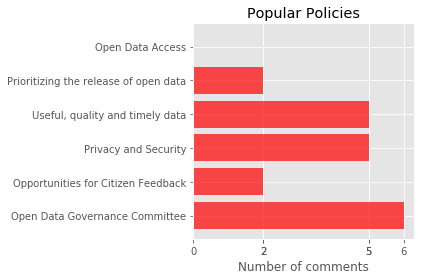

In [60]:
horizontal_bar(main_policies_3, count_pop_policies_3, "Number of comments", "Popular Policies")

This chart corroborates our analysis done earlier. Issues such as *governance*, *privacy* and *utility* are most popular issues in the open data policy.

# 5) which comments are highly liked or replied to?

### a) analysis of comments with *2 likes or more*

In [61]:
high_likes_comments = likes_replies_analysis("2", 'num_likes', all_cities_dataframe)


comment:

I am in support of the proposed policy to further enable data and subsequent knowledge sharing. I agree with fellow contributors that it would be beneficial to see more detailed outlines for the specific process that is going to enable community members to contribute to the Open Data portal by creating, uploading and verifying data sets to be published. Myself and colleagues have created a number of valuable data sets that could be beneficial across city departments, community organizations and individual interests. Understanding that only data sets meeting the standards set forth as a result of this policy will be accepted, we can collaboratively drive the understanding of our community from all perspectives.

comment:

I strongly support the proposed policy, with a recognition of the outstanding contributions that have already been made by other residents, citizens, and interested parties.Many thanks to the City of Buffalo for leading this effort. Most of my comments are w

In [62]:
high_likes_comments.head(3)

,index,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,reply_ids_count,city_name
0,1,E4-XFnl1uKc,Aaron Lee,2017-01-25 04:32:19,2,None,I am in support of the proposed policy to furt...,<p>I am in support of the proposed policy to f...,[],0,Buffalo
1,3,E4-XFnQhy2g,Aaron Krolikowski,2017-01-24 22:56:17,3,None,"I strongly support the proposed policy, with a...","<p>I strongly support the proposed policy, wit...",[],0,Buffalo
2,13,E4-XFl5JXZo,Robert Galbraith,2017-01-24 20:30:42,2,None,The following comment is submitted on behalf o...,<p>The following comment is submitted on behal...,[E4-XFmHvN6E],1,Buffalo


In [63]:
high_likes_comments_count_city = high_likes_comments.groupby(['city_name']).size().reset_index().rename(columns={0:'count'})

In [64]:
high_likes_comments_count_city

,city_name,count
0,Buffalo,17
1,Naperville,2
2,Syracuse,7


In [65]:
likes_x = high_likes_comments_count_city['city_name'].tolist()
likes_y = high_likes_comments_count_city['count'].tolist()

### b) analysis of comments with *2 replies or more*

In [66]:
high_replies = likes_replies_analysis(2, 'reply_ids_count', all_cities_dataframe)


comment:

Remove "paramount." Privacy, confidentiality and security should be considerations when determining whether data should be open, but they should not be presumed to be paramount and therefore superior to the public's right to know.

comment:

residents, government leaders, businesses, nonprofits, foundations, researchers, and the media,

comment:

Not sure what this means for formats such as the ESRI shapefile (proprietary GIS format). I'm assuming that much of the infrastructure data will be in this format. All things being equal, having data in a proprietary format would be better than no data.

comment:

Other options being explored? Bulk dataset download is still very common and effective, especially for those users who may not be comfortable accessing an API.

comment:

Promote open data that informs increases in government efficiency, improvements in the quality of life of its citizens, and more equal opportunities for all residents.
Commit to data driven decision makin

In [67]:
high_replies.head(3)

,index,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,reply_ids_count,city_name
0,11,E4-XFmN-hx8,Stephanie Perry,2017-01-24 21:35:45,0,paramount,"Remove ""paramount."" Privacy, confidentiality a...","<p>Remove ""paramount."" Privacy, confidentialit...","[E4-XFmQX0U8, E4-XFmS4XPs]",2,Buffalo
1,17,E4-XFksGPRs,Curtis Robbins,2017-01-24 18:01:32,2,"residents, government leaders, businesses, res...","residents, government leaders, businesses, non...","<p>residents, government leaders, businesses, ...","[E4-XFkw6sfw, E4-XFk-iSC4]",2,Buffalo
2,29,E4-XFi0e-l4,Peter Johnson,2017-01-24 04:06:27,0,nonproprietary,Not sure what this means for formats such as t...,<p>Not sure what this means for formats such a...,"[E4-XFjtF_-E, E4-XFkB8kn4]",2,Buffalo


In [68]:
high_replies_comments_count_city = high_replies.groupby(['city_name']).size().reset_index().rename(columns={0:'count'})

In [69]:
high_replies_comments_count_city

,city_name,count
0,Buffalo,13
1,Naperville,1
2,Syracuse,9


In [70]:
replies_x = high_replies_comments_count_city['city_name'].tolist()
replies_y = high_replies_comments_count_city['count'].tolist()

#### stacked chart

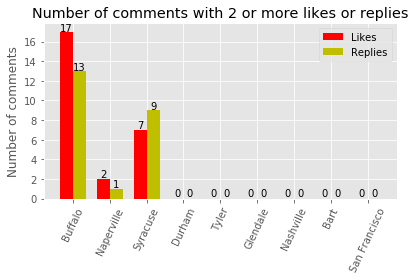

In [71]:
likes_replies_chart('Number of comments', ('Likes', 'Replies'), 'Number of comments with 2 or more likes or replies', likes_x, likes_y, replies_x, replies_y, all_madison_dfs, "likes_replies_analysis")

While the policy sections on providing opportunities for more community feedback or open data access were few, the comments related to them were highly “liked” or “replied to” by people.


Some other highly liked or replied to comments were regarding tools to make data easily accessible and useful by creating metadata (Joseph Gosen, Buffalo) or presenting data in a range of formats such as xml, shapefile etc. (Karyn Tareen, CEO, Geocove - Buffalo).

# 6) Authors' analysis

##### the following analysis was done after finding out details of the authors' on the internet (see authors_names.py)

In [89]:
authors_details_df = authors_details_dataframe(all_cities_dataframe)

In [90]:
authors_details_df.head(2)

,comment_id,author,Position,Company_name,Category_work,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,city_name
1,E4-XFnl1uKc,Aaron Lee,Software Developer,Solace Systems,Private,2017-01-25 04:32:19,2,None,I am in support of the proposed policy to furt...,<p>I am in support of the proposed policy to f...,[],Buffalo
2,E4-XFnjG3Ac,Aaron Lee,Software Developer,Solace Systems,Private,2017-01-25 04:25:20,0,public participation by providing regular oppo...,I would be interested to see this more finely ...,<p>I would be interested to see this more fine...,[],Buffalo


##### count just positions

In [91]:
count_positions = authors_details_df.drop_duplicates('author').reset_index()
count_just_positions = authors_details_analysis('Position', count_positions)
#count_just_positions.head()

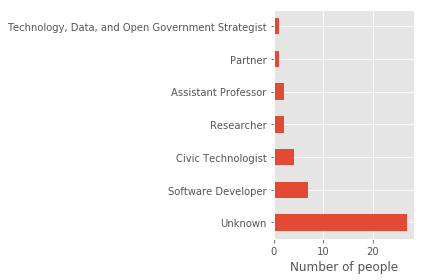

In [92]:
horizontal_bar_from_dataframe(count_just_positions.head(7), "Position", "count", "Number of people")

Out of 65 users, we could not find details for 27 of them. Of those that we did, majority of them had technical backgrounds.

#####  Position with city-wise analysis

In [98]:
count_positions1 = count_positions.groupby(['Position', 'city_name']).size().reset_index().rename(columns={0:'count'})

In [99]:
count_positions2 = count_positions1.sort_values(['city_name', 'count'], ascending=False)

In [100]:
# select only top two positions in each city
count_positions3 = count_positions2.groupby('city_name').head(2)

In [101]:
position_list = count_positions3['Position'].tolist()
city_list = count_positions['city_name'].unique().tolist()

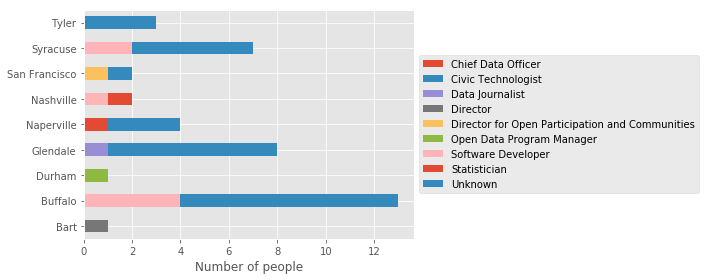

In [103]:
horizontal_stacked_bar_from_dataframe(count_positions3, "city_name", "Position", "count", "Number of people", "who-comments-the-most")

The graph shows the two top most occupations of users for each city.  Of the open data users that we identified, most of them come from technical backgrounds such as software development, statistics, data science, data journalism and more. Very few people come from other backgrounds such as academia, community management etc. 

 ##### count just categories

In [93]:
count_just_categories = authors_details_analysis('Category_work', count_positions)
#count_just_categories

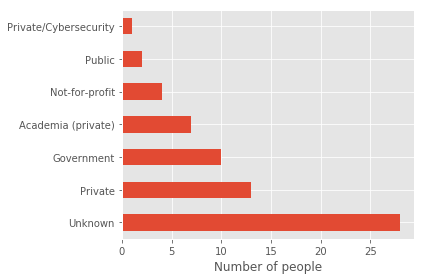

In [94]:
horizontal_bar_from_dataframe(count_just_categories, "Category_work", "count", "Number of people")

According to our analysis, a number of users we identified belong to different sized private companies. These companies are a mix of start-ups and digital agencies that provide services in IT, GIS, data visualization, website optimization and management consulting. About ten users work in the government at the federal, city, and foreign levels. Academics and researchers, especially those who work in [fill this] also take keen interest in open data policy-making. 

### Are technical authors saying only technical things?

In [54]:
technical_positions = ['Software Developer', 'Data Scientist', 'Statistician', 'Chief Data Officer', 'Data Journalist']

In [63]:
for index, row in authors_details_df.iterrows():
    if row['Position'] in technical_positions:
        print('\033[1m' + "City:", row['city_name'])
        print('\033[0m' + "Position:", row['Position'])
        print('\033[1m' + "Comment text:", row['comment_text'])
        print()

City: Buffalo
Position: Software Developer
Comment text: I am in support of the proposed policy to further enable data and subsequent knowledge sharing. I agree with fellow contributors that it would be beneficial to see more detailed outlines for the specific process that is going to enable community members to contribute to the Open Data portal by creating, uploading and verifying data sets to be published. Myself and colleagues have created a number of valuable data sets that could be beneficial across city departments, community organizations and individual interests. Understanding that only data sets meeting the standards set forth as a result of this policy will be accepted, we can collaboratively drive the understanding of our community from all perspectives.

City: Buffalo
Position: Software Developer
Comment text: I would be interested to see this more finely documented. It would be great to have a living, breathering process that community members could submit data sets that 

In [104]:
# hand-made (this needs eye-balling comments/quoted policy text every time a policy is updated/new policy is added)

technical_issues_by_tech_ppl_categories = ['Technical', 'Data Governance Committee', 'Utility']
technical_issues_by_tech_ppl_count = [9, 2, 2]

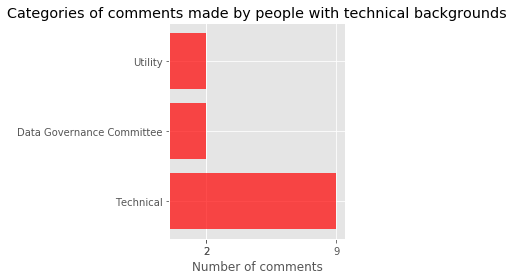

In [106]:
horizontal_bar(technical_issues_by_tech_ppl_categories, technical_issues_by_tech_ppl_count, "Number of comments", "Categories of comments made by people with technical backgrounds")

This graph shows the categories of comments made by people from technical backgrounds. Most comments are technical in nature that refer to issues such as the need to adopt data standards, availability of metadata, API’s, and storing data in a central repository. 

# 7) Support vs. Rejection Count

In [113]:
support, rejection, cities = support_n_rejection_analysis(all_madison_dfs)

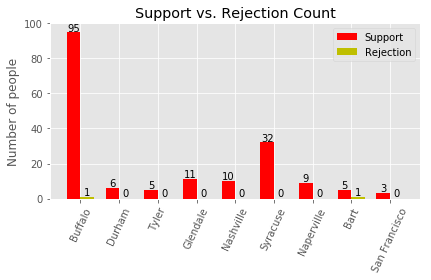

In [114]:
likes_replies_chart('Number of people', ('Support', 'Rejection'), 'Support vs. Rejection Count', cities, support, cities, rejection, all_madison_dfs, None)

This chart shows the number of people who have supported or rejected an open data policy. Only one rejection has been registered for the City of Buffalo and the BART system, indicating that open data policies, in general, are welcomed and appreciated by residents.